### Content

* Install libraries


##### Install libraries

<!-- !pip install association_metrics
!pip install dython -->

##### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading dataset

In [2]:
concrete = pd.read_csv("concrete.csv")
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


##### Pearson's correlation (r) using pandas

In [4]:
cor_df = concrete.corr(method = "pearson").round(2)
cor_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.00,-0.28,-0.40,-0.08,0.09,-0.11,-0.22,0.08,0.50
slag,-0.28,1.00,-0.32,0.11,0.04,-0.28,-0.28,-0.04,0.13
ash,-0.40,-0.32,1.00,-0.26,0.38,-0.01,0.08,-0.15,-0.11
water,-0.08,0.11,-0.26,1.00,-0.66,-0.18,-0.45,0.28,-0.29
superplastic,0.09,0.04,0.38,-0.66,1.00,-0.27,0.22,-0.19,0.37
coarseagg,-0.11,-0.28,-0.01,-0.18,-0.27,1.00,-0.18,-0.00,-0.16
fineagg,-0.22,-0.28,0.08,-0.45,0.22,-0.18,1.00,-0.16,-0.17
age,0.08,-0.04,-0.15,0.28,-0.19,-0.00,-0.16,1.00,0.33
strength,0.50,0.13,-0.11,-0.29,0.37,-0.16,-0.17,0.33,1.00


##### Pearson's pairwise correlation plot using Pandas and matplotlib library

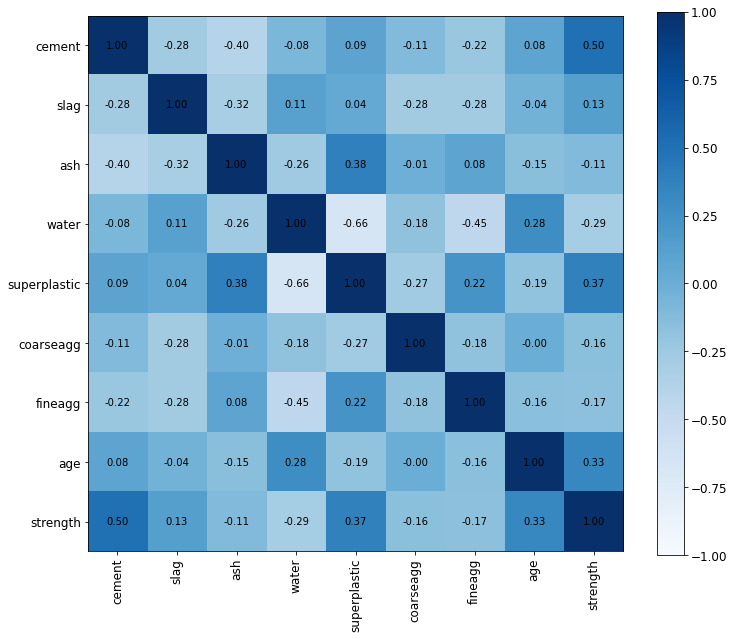

In [5]:
fig, ax = plt.subplots(figsize = (12, 10))

cax = ax.imshow(cor_df.values,
                interpolation = 'nearest',
                cmap = 'Blues',
                vmin = -1,
                vmax = 1)

ax.set_xticks(ticks = range(len(concrete.columns)),
              labels = concrete.columns)
ax.set_yticks(ticks = range(len(concrete.columns)),
              labels = concrete.columns)

ax.tick_params(axis = "x", labelsize = 12, labelrotation = 90)
ax.tick_params(axis = "y", labelsize = 12, labelrotation = 0)
fig.colorbar(cax).ax.tick_params(labelsize = 12)

for (x, y), t in np.ndenumerate(cor_df):
    ax.annotate("{:.2f}".format(t),
    xy = (x, y),
    va = "center",
    ha = "center")
    
fig.savefig("pearson_correlation_matrix.png", dpi = 300, bbox_inches = "tight")

##### Plot Pearson's pairwise correlation coefficients using dython library

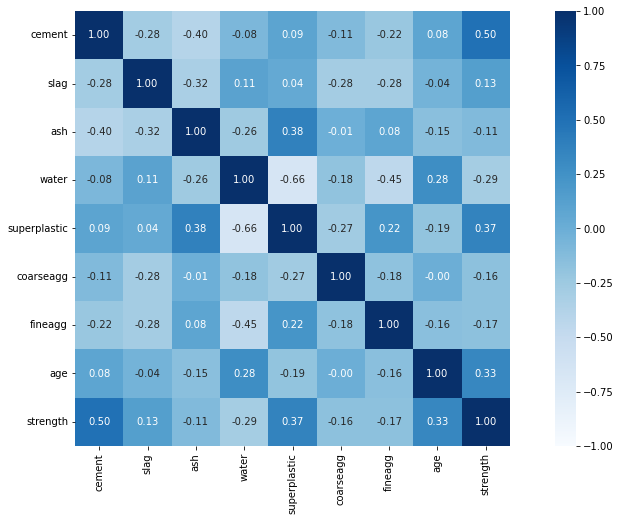

In [6]:
# using dython library
from dython.nominal import associations

fig, ax = plt.subplots(figsize=(16, 8))

r = associations(concrete, ax = ax, cmap = "Blues")

##### Getting the correlation matrix [in terms of pandas dataframe]

In [7]:
r["corr"].round(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.00,-0.28,-0.40,-0.08,0.09,-0.11,-0.22,0.08,0.50
slag,-0.28,1.00,-0.32,0.11,0.04,-0.28,-0.28,-0.04,0.13
ash,-0.40,-0.32,1.00,-0.26,0.38,-0.01,0.08,-0.15,-0.11
water,-0.08,0.11,-0.26,1.00,-0.66,-0.18,-0.45,0.28,-0.29
superplastic,0.09,0.04,0.38,-0.66,1.00,-0.27,0.22,-0.19,0.37
coarseagg,-0.11,-0.28,-0.01,-0.18,-0.27,1.00,-0.18,-0.00,-0.16
fineagg,-0.22,-0.28,0.08,-0.45,0.22,-0.18,1.00,-0.16,-0.17
age,0.08,-0.04,-0.15,0.28,-0.19,-0.00,-0.16,1.00,0.33
strength,0.50,0.13,-0.11,-0.29,0.37,-0.16,-0.17,0.33,1.00


##### Pearson's Correlation using pingouin library

In [8]:
import pingouin as pg

(
    pg.pairwise_corr(concrete,
                     columns=["cement", "water", "strength", "superplastic"],
                     method='pearson')
    .round(3)
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,cement,water,pearson,two-sided,1030,-0.082,"[-0.14, -0.02]",0.009,1.201,0.746
1,cement,strength,pearson,two-sided,1030,0.498,"[0.45, 0.54]",0.000,1.106e+62,1.000
2,cement,superplastic,pearson,two-sided,1030,0.092,"[0.03, 0.15]",0.003,3.172,0.844
3,water,strength,pearson,two-sided,1030,-0.290,"[-0.34, -0.23]",0.000,1.294e+18,1.000
4,water,superplastic,pearson,two-sided,1030,-0.658,"[-0.69, -0.62]",0.000,5.608e+124,1.000
5,strength,superplastic,pearson,two-sided,1030,0.366,"[0.31, 0.42]",0.000,4.453e+30,1.000


### Cramer's V [Nominal associations]

In [38]:
# Loading tips dataset
tips = sns.load_dataset("tips")

# Print first five observations
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
# Using association_metrics library
import association_metrics as am

# Convert object columns to Category columns
df = tips.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)

# Initialize a CamresV object using the pandas.DataFrame (df)
cramers_v = am.CramersV(df) 

# It will return a pairwise matrix filled with Cramer's V, where 
# columns and index are the categorical variables of the passed
cfit = cramers_v.fit().round(2)
cfit

,sex,smoker,day,time
sex,1.00,0.00,0.23,0.21
smoker,0.00,1.00,0.33,0.05
day,0.23,0.33,1.00,0.94
time,0.21,0.05,0.94,1.00


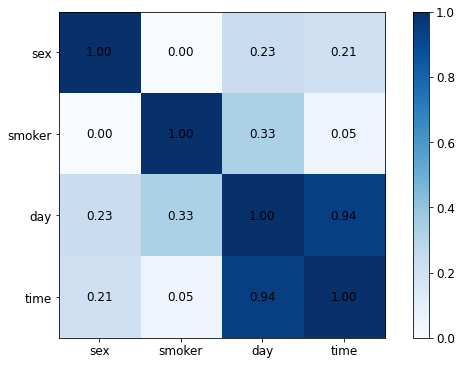

In [40]:
# Instantiating a figure and axes object
fig, ax = plt.subplots(figsize = (10, 6))
# Generate a plot
cax = ax.imshow(cfit.values, interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
# Setting the axes labels
ax.set_xticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
ax.set_yticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
# Setting tick parameters
ax.tick_params(axis = "x", labelsize = 12, labelrotation = 0)
ax.tick_params(axis = "y", labelsize = 12, labelrotation = 0)
# Adding a colorbar
fig.colorbar(cax).ax.tick_params(labelsize = 12)
# Adding annotations
for (x, y), t in np.ndenumerate(cfit):
    ax.annotate("{:.2f}".format(t),
                xy = (x, y),
                va = "center",
                ha = "center").set(color = "black", size = 12)

### Cramer's V using dython library

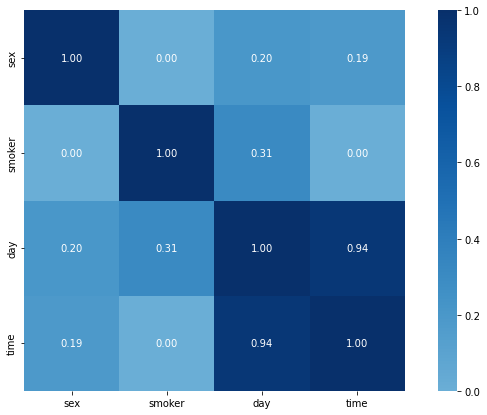

In [42]:
# Importing library
from dython.nominal import associations

# Convert categorical columns to object columns
df = tips.apply(
        lambda x: x.astype("object") if x.dtype == "category" else x)

# Instantiate a figure and axis object
fig, ax = plt.subplots(figsize = (12, 7))

# Estimate and generate Cramer's V association plot
cramers_v = associations(df[["sex", "smoker", "day", "time"]],
             nom_nom_assoc = 'cramer',
             ax = ax,
             cmap = "Blues")

In [44]:
cramers_v["corr"].round(2)

,sex,smoker,day,time
sex,1.00,0.00,0.20,0.19
smoker,0.00,1.00,0.31,0.00
day,0.20,0.31,1.00,0.94
time,0.19,0.00,0.94,1.00


In [45]:
cramers_v["ax"]

<AxesSubplot:>

### Theil's U association matrix plot

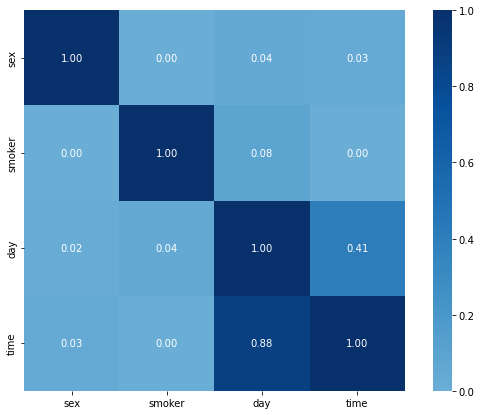

In [48]:
from dython.nominal import associations

# Convert categorical columns to object columns
df = tips.apply(
        lambda x: x.astype("object") if x.dtype == "category" else x)

fig, ax = plt.subplots(figsize = (10, 7))

theils_u = associations(df[["sex", "smoker", "day", "time"]],
             nom_nom_assoc = 'theil',
             ax = ax,
             cmap = "Blues")